In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.gridspec as gridspec
import ast
import sys
sys.path.append('machine-scientist/')
sys.path.append('machine-scientist/Prior/')
from mcmc import *
from parallel import *
from fit_prior import read_prior_par

from sklearn.metrics import mean_squared_error

In [8]:
#Read NN and BMS data

n=0;function='leaky_ReLU' #tanh, leaky_ReLU
NPAR=20 #10, 20

#Read NN data
train_size=60
file_model='NN_model_' + function + '_train_' +str(train_size)+ '_NREP_10_data' + '.csv'
model_d='../data/' + file_model
d=pd.read_csv(model_d)
dn=d[d['rep']==n]
dn.set_index('Unnamed: 0', inplace=True)
dn.index.name = None
dn=dn.reset_index(drop=True)

#Read BMS data
filename='BMS_' + function + '_trace.' + str(n) + '.csv'
trace=pd.read_csv('../data/MSTraces/' + filename, sep=';', header=None, names=['t', 'H', 'expr', 'parvals', 'kk1', 'kk2','kk3'])

In [9]:
#Sample trace
sample_step=5000
trace_s=trace.iloc[::sample_step, :]
models=len(trace_s.index)

In [12]:
VARS = ['x1',]
x = dn[[c for c in VARS]].copy()
y = dn.y

if NPAR==10:
    prior_par = read_prior_par('machine-scientist/Prior/final_prior_param_sq.named_equations.nv1.np10.2017-10-18 18:07:35.089658.dat')
elif NPAR==20:
    prior_par = read_prior_par('machine-scientist/Prior/final_prior_param_sq.named_equations.nv1.np20.maxs200.2024-05-10 162907.551306.dat')

dall = deepcopy(dn)

for row in range(models):
    
    H_r, expr_r, parvals_r = trace_s.iloc[row].H, trace_s.iloc[row].expr, ast.literal_eval(trace_s.iloc[row].parvals)
    
    t = Tree(
    variables=list(x.columns),
    parameters=['a%d' % i for i in range(NPAR)],
    x=x, y=y,
    prior_par=prior_par,
    max_size=200,
    from_string=expr_r,
)
    t.set_par_values(deepcopy(parvals_r))

    dall['ybms_' + str(row)] = t.predict(x)

print(dall)

#dall['median']=dall[['ybms_0', 'ybms_1', 'ybms_2']].median(axis=1)
dall['ybms_median']=dall[['ybms_' +str(i) for i in range(models)]].median(axis=1)
print(dall)

      x1         y  rep    ymodel  ybms_0        ybms_1  ybms_2  ybms_3  \
0  -1.95  0.003403  0.0  0.003116   -1.95  6.084194e+00     1.0     1.0   
1  -1.90  0.003406  0.0  0.003181   -1.90  6.007179e+00     1.0     1.0   
2  -1.85  0.003409  0.0  0.003258   -1.85  5.930164e+00     1.0     1.0   
3  -1.80  0.003413  0.0  0.003347   -1.80  5.853149e+00     1.0     1.0   
4  -1.75  0.003416  0.0  0.003446   -1.75  5.776134e+00     1.0     1.0   
..   ...       ...  ...       ...     ...           ...     ...     ...   
75  1.80  0.533152  0.0  0.506897    1.80  3.080605e-01     1.0     1.0   
76  1.85  0.544009  0.0  0.514880    1.85  2.310453e-01     1.0     1.0   
77  1.90  0.554866  0.0  0.522673    1.90  1.540302e-01     1.0     1.0   
78  1.95  0.565723  0.0  0.530274    1.95  7.701512e-02     1.0     1.0   
79  2.00  0.576579  0.0  0.537679    2.00  3.249150e-14     1.0     1.0   

    ybms_4  ybms_5  ybms_6  ybms_7  ybms_8  ybms_9  
0      1.0     1.0     1.0   -1.95     1.0   -

In [16]:
#Find the model with the minimum MSE
mse_models=[mean_squared_error(dall['ybms_'+ str(i)], dall.ybms_median) for i in range(models)] #find mean squared error of all models
print(mse_models)
print(min(mse_models))
best_model=mse_models.index(min(mse_models)) #find best model

print(dall)
print(dall['ybms_'+ str(best_model)])

[2.283750000000018, 7.333041025606367, 0.0, 0.0, 0.0, 0.0, 0.0, 2.283750000000018, 0.0, 2.283750000000018]
0.0
      x1         y  rep    ymodel  ybms_0        ybms_1  ybms_2  ybms_3  \
0  -1.95  0.003403  0.0  0.003116   -1.95  6.084194e+00     1.0     1.0   
1  -1.90  0.003406  0.0  0.003181   -1.90  6.007179e+00     1.0     1.0   
2  -1.85  0.003409  0.0  0.003258   -1.85  5.930164e+00     1.0     1.0   
3  -1.80  0.003413  0.0  0.003347   -1.80  5.853149e+00     1.0     1.0   
4  -1.75  0.003416  0.0  0.003446   -1.75  5.776134e+00     1.0     1.0   
..   ...       ...  ...       ...     ...           ...     ...     ...   
75  1.80  0.533152  0.0  0.506897    1.80  3.080605e-01     1.0     1.0   
76  1.85  0.544009  0.0  0.514880    1.85  2.310453e-01     1.0     1.0   
77  1.90  0.554866  0.0  0.522673    1.90  1.540302e-01     1.0     1.0   
78  1.95  0.565723  0.0  0.530274    1.95  7.701512e-02     1.0     1.0   
79  2.00  0.576579  0.0  0.537679    2.00  3.249150e-14     1.0 

      x1         y  rep    ymodel  ybms_0        ybms_1  ybms_2  ybms_3  \
0  -1.95  0.003403  0.0  0.003116   -1.95  6.084194e+00     1.0     1.0   
1  -1.90  0.003406  0.0  0.003181   -1.90  6.007179e+00     1.0     1.0   
2  -1.85  0.003409  0.0  0.003258   -1.85  5.930164e+00     1.0     1.0   
3  -1.80  0.003413  0.0  0.003347   -1.80  5.853149e+00     1.0     1.0   
4  -1.75  0.003416  0.0  0.003446   -1.75  5.776134e+00     1.0     1.0   
..   ...       ...  ...       ...     ...           ...     ...     ...   
75  1.80  0.533152  0.0  0.506897    1.80  3.080605e-01     1.0     1.0   
76  1.85  0.544009  0.0  0.514880    1.85  2.310453e-01     1.0     1.0   
77  1.90  0.554866  0.0  0.522673    1.90  1.540302e-01     1.0     1.0   
78  1.95  0.565723  0.0  0.530274    1.95  7.701512e-02     1.0     1.0   
79  2.00  0.576579  0.0  0.537679    2.00  3.249150e-14     1.0     1.0   

    ybms_4  ybms_5  ybms_6  ybms_7  ybms_8  ybms_9  ybms_median  
0      1.0     1.0     1.0   -1.9

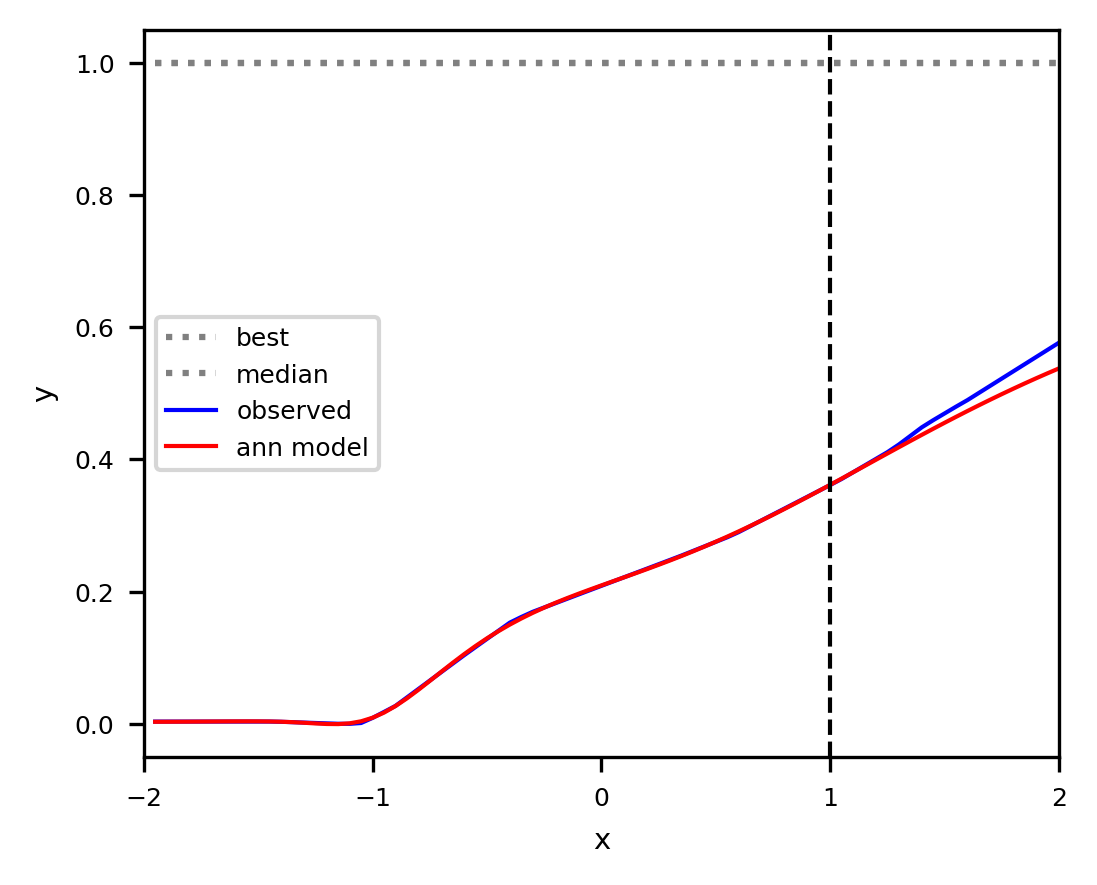

In [21]:
#Plot
train_border=dn.loc[train_size-1]['x1']
print(dall)
#Define figure size in cm                                                                           
cm = 1/2.54 #convert inch to cm                                                                     
width = 10*cm; height=8*cm

Extensions=['.png', '.pdf']

#Fonts and sizes                                                                                    
size_axis=7;size_ticks=6;size_title=5
line_w=1;marker_s=3 #width and marker size                                                          


fig=figure(figsize=(width,height), dpi=300)

plt.plot(dall.x1, dall['ybms_'+ str(best_model)], color='gray', linestyle=':',label='best')
plt.plot(dall.x1, dall.ybms_median, color='gray', linestyle=':',label='median')
plt.plot(dn['x1'], dn['y'],linewidth=line_w, color='blue',label='observed')                                                      
plt.plot(dn['x1'], dn['ymodel'],linewidth=line_w, color='red', label='ann model')

plt.axvline(x=train_border,linestyle='--',linewidth=line_w, color='k')


plt.xlabel('x',fontsize=size_axis);plt.ylabel('y',fontsize=size_axis)
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
plt.legend(loc='best', fontsize=size_ticks)

plt.xlim(-2,2);#plt.ylim(-0.1,1.1)                                               

Name_figure='Test_' + function + '_' + str(n)
for ext in Extensions:
        plt.savefig('../results/' + Name_figure +ext,dpi=300)

plt.show()